In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

%matplotlib inline



#      

# Percent Female Students in Secondary Education (Cleaning Data)

In [2]:
#reading in data on female students in school
percent_female_in_secondary_school = pd.read_csv("../data/%_female_in_secondary_education.csv")
percent_female_in_secondary_school.tail()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
4972,Zimbabwe,1979,Female,Not applicable,Percent,45.30896
4973,Zimbabwe,1978,Female,Not applicable,Percent,43.32329
4974,Zimbabwe,1977,Female,Not applicable,Percent,42.61502
4975,Zimbabwe,1976,Female,Not applicable,Percent,41.88793
4976,Zimbabwe,1975,Female,Not applicable,Percent,41.49989


In [3]:
#dropping columns not used and renaming remaining columns
percent_female_in_secondary_school = percent_female_in_secondary_school.drop(['Sex','Age group','Units of measurement'], axis = 1)
percent_female_in_secondary_school.columns = ['Country', 'Year','%_female_students_in_secondary']
percent_female_in_secondary_school.head(20)

,Country,Year,%_female_students_in_secondary
0,Afghanistan,2014,34.62152
1,Afghanistan,2013,34.43871
2,Afghanistan,2012,34.63026
3,Afghanistan,2011,34.45594
4,Afghanistan,2010,32.00865
5,Afghanistan,2009,31.26018
6,Afghanistan,2008,28.63063
7,Afghanistan,2007,26.06118
8,Afghanistan,2006,25.40252
9,Afghanistan,2005,23.36562


In [4]:
percent_female_in_secondary_school.shape


(4977, 3)


#      
# Male/Female Number of Seats in Parliament/ House/ Senate (Cleaning Data)

In [5]:
#reading in data on female members of countries parliament
male_female_parliamentary_seats = pd.read_csv("../data/parliamentary_seats_in_upper_house_senate.csv")
male_female_parliamentary_seats .head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female,2007.0,IPU_Women in National Parliaments_Sep2007,Number,23.0,1.0
1,Afghanistan,Female,2006.0,IPU_Women in National Parliaments_Sep2007,Number,23.0,2.0
2,Afghanistan,Male,2007.0,IPU_Women in National Parliaments_Sep2007,Number,79.0,1.0
3,Afghanistan,Male,2006.0,IPU_Women in National Parliaments_Sep2007,Number,79.0,2.0
4,Algeria,Female,2007.0,IPU_Women in National Parliaments_Sep2007,Number,4.0,1.0


In [6]:
#dropping columns not used and renaming remaining columns
#Checked and nothing is important about footnotes
male_female_parliamentary_seats = male_female_parliamentary_seats.drop(['Source','Unit','Value Footnotes'], axis = 1)

In [7]:
male_female_parliamentary_seats.columns = ['Country', 'Sex', 'Year', 'Number_of_Seats_Held']
male_female_parliamentary_seats.head()

,Country,Sex,Year,Number_of_Seats_Held
0,Afghanistan,Female,2007.0,23.0
1,Afghanistan,Female,2006.0,23.0
2,Afghanistan,Male,2007.0,79.0
3,Afghanistan,Male,2006.0,79.0
4,Algeria,Female,2007.0,4.0


In [8]:
male_female_parliamentary_seats.dtypes

Country                  object
Sex                      object
Year                    float64
Number_of_Seats_Held    float64
dtype: object

In [9]:
#making year and number_seats_held into int
male_female_parliamentary_seats = male_female_parliamentary_seats.dropna()
male_female_parliamentary_seats['Year'] = male_female_parliamentary_seats['Year'].astype(int)
male_female_parliamentary_seats['Number_of_Seats_Held'] = male_female_parliamentary_seats['Number_of_Seats_Held'].astype(int)

In [10]:
male_female_parliamentary_seats.dtypes

Country                 object
Sex                     object
Year                     int32
Number_of_Seats_Held     int32
dtype: object

In [11]:
male_female_parliamentary_seats.shape

(1362, 4)

In [12]:
male_female_parliamentary_seats.head()

,Country,Sex,Year,Number_of_Seats_Held
0,Afghanistan,Female,2007,23
1,Afghanistan,Female,2006,23
2,Afghanistan,Male,2007,79
3,Afghanistan,Male,2006,79
4,Algeria,Female,2007,4


In [13]:
male_female_parliamentary_seats_pivot = male_female_parliamentary_seats.pivot_table(index = ['Country','Year'], columns = 'Sex', values = 'Number_of_Seats_Held').reset_index().rename_axis(None, axis = 1)
male_female_parliamentary_seats_pivot.head()

,Country,Year,Female,Male
0,Afghanistan,2006,23,79
1,Afghanistan,2007,23,79
2,Algeria,1998,8,136
3,Algeria,1999,8,136
4,Algeria,2000,8,136


In [14]:
male_female_parliamentary_seats_pivot.columns = ['Country', 'Year', 'Number_of_Seats_Held_Female','Number_of_Seats_Held_Male']
male_female_parliamentary_seats_pivot.head()

,Country,Year,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male
0,Afghanistan,2006,23,79
1,Afghanistan,2007,23,79
2,Algeria,1998,8,136
3,Algeria,1999,8,136
4,Algeria,2000,8,136



    
#      
# Percent of Women in Country's Labor Force (Cleaning Data)

In [15]:
#reading in data on female % of workforce
percent_women_in_labour_force = pd.read_csv("../data/womens_%_labour_force.csv")
percent_women_in_labour_force.head()

,Country or Area,Subgroup,Year,Unit,Value,Value Footnotes
0,Afghanistan,Female 15+ yr,2006.0,Percent,29.4,NaN
1,Afghanistan,Female 15+ yr,2005.0,Percent,29.0,NaN
2,Afghanistan,Female 15+ yr,2004.0,Percent,28.8,NaN
3,Afghanistan,Female 15+ yr,2003.0,Percent,28.8,NaN
4,Afghanistan,Female 15+ yr,2002.0,Percent,28.6,NaN


In [16]:
#dropping columns not used and renaming remaining columns
#Checked and nothing is important about footnotes
percent_women_in_labour_force = percent_women_in_labour_force.drop(['Subgroup','Unit','Value Footnotes'], axis = 1)

In [17]:
#renaming columns
percent_women_in_labour_force.columns = ['Country','Year','%_women_in_labor_force']

In [18]:
#changing year to int
percent_women_in_labour_force = percent_women_in_labour_force.dropna()
percent_women_in_labour_force['Year'] = percent_women_in_labour_force['Year'].astype(int)

In [19]:
percent_women_in_labour_force.dtypes

Country                    object
Year                        int32
%_women_in_labor_force    float64
dtype: object

In [20]:
percent_women_in_labour_force.shape

(4158, 3)

In [21]:
percent_women_in_labour_force.head()

,Country,Year,%_women_in_labor_force
0,Afghanistan,2006,29.4
1,Afghanistan,2005,29.0
2,Afghanistan,2004,28.8
3,Afghanistan,2003,28.8
4,Afghanistan,2002,28.6


#   
# Merging the 3 data sets with inner join to see how many values are in all 3

In [22]:
#merging female in education with parliament data
education_and_parliament_df = percent_female_in_secondary_school.merge(male_female_parliamentary_seats_pivot, on = ['Country','Year'], how = 'inner')
print(education_and_parliament_df.shape)
education_and_parliament_df.head()

(495, 5)


,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male
0,Afghanistan,2007,26.06118,23,79
1,Afghanistan,2006,25.40252,23,79
2,Algeria,2007,50.96425,4,125
3,Algeria,2006,51.21634,4,140
4,Algeria,2005,51.23837,4,140


In [23]:
#merging education_and_parliament with labor force data
education_and_gender = education_and_parliament_df.merge(percent_women_in_labour_force, on = ['Country','Year'], how = 'inner')
print(education_and_gender.shape)
education_and_gender.head()

(430, 6)


,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force
0,Afghanistan,2006,25.40252,23,79,29.4
1,Algeria,2006,51.21634,4,140,31.1
2,Algeria,2005,51.23837,4,140,30.6
3,Algeria,2004,51.12901,28,116,30.1
4,Algeria,2003,51.05841,8,136,29.5


In [24]:
education_and_gender['%_female_in_parliament'] = (education_and_gender['Number_of_Seats_Held_Female'] / (education_and_gender['Number_of_Seats_Held_Female'] + education_and_gender['Number_of_Seats_Held_Male']))*100
education_and_gender.head()

,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
0,Afghanistan,2006,25.40252,23,79,29.4,22.549020
1,Algeria,2006,51.21634,4,140,31.1,2.777778
2,Algeria,2005,51.23837,4,140,30.6,2.777778
3,Algeria,2004,51.12901,28,116,30.1,19.444444
4,Algeria,2003,51.05841,8,136,29.5,5.555556


#  
# Exploring Data

In [25]:
education_and_gender.describe()

,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,2002.081395,48.746737,12.472093,81.246512,40.725116,15.975574
std,2.750779,3.986931,11.604714,74.941965,6.696112,10.278572
min,1997.000000,25.402520,0.000000,5.000000,16.600000,0.000000
25%,2000.000000,48.019588,4.000000,34.000000,38.350000,7.975460
50%,2002.000000,49.347365,9.000000,52.000000,42.900000,13.363095
75%,2005.000000,50.788713,18.000000,96.000000,44.900000,23.166023
max,2006.000000,58.682280,63.000000,303.000000,52.400000,59.420290


In [26]:
education_and_gender[education_and_gender['%_female_students_in_secondary']<35]

,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
0,Afghanistan,2006,25.40252,23,79,29.4,22.549020
91,Cambodia,2000,34.89699,8,53,51.4,13.114754
253,Mauritania,1997,34.51685,0,56,40.1,0.000000
429,Yemen,2005,32.07058,3,108,28.0,2.702703


In [35]:
education_and_gender[education_and_gender['%_female_in_parliament']>50]

,Country,Year,%_female_students_in_secondary,Number_of_Seats_Held_Female,Number_of_Seats_Held_Male,%_women_in_labor_force,%_female_in_parliament
162,Germany,2000,48.35321,41,28,43.7,59.42029


#   
# Visualizing with Scatter Plots

Text(0, 0.5, '% Females in Labor Force')

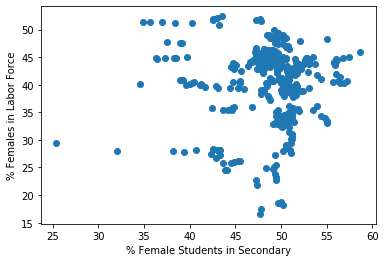

In [34]:
plt.scatter(x = education_and_gender['%_female_students_in_secondary'], y = education_and_gender['%_women_in_labor_force'])
plt.xlabel('% Female Students in Secondary')
plt.ylabel('% Females in Labor Force')

Text(0, 0.5, '% Women in Parliament')

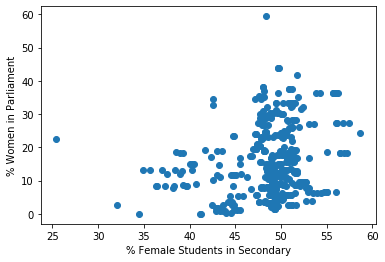

In [33]:
plt.scatter(x = education_and_gender['%_female_students_in_secondary'], y = education_and_gender['%_female_in_parliament'])
plt.xlabel('% Female Students in Secondary')
plt.ylabel('% Women in Parliament')

Text(0, 0.5, '% Female in Parliament')

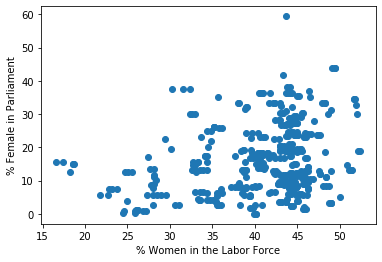

In [31]:
plt.scatter(x = education_and_gender['%_women_in_labor_force'], y = education_and_gender['%_female_in_parliament'])
plt.xlabel('% Women in the Labor Force')
plt.ylabel('% Female in Parliament')